In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [4]:
dataset, info = tfds.load('fashion_mnist',with_info=True, as_supervised=True, data_dir='C:\\Users\\HP\\tensorflow_datasets\\downloads')

In [6]:
train = dataset['train']
test = dataset['test']

### Explore

In [13]:
num_train = info.splits['train'].num_examples
num_test = info.splits['test'].num_examples

print('number of training examples:',num_train)
print('number of testing examples:',num_test)

number of training examples: 60000
number of testing examples: 10000


In [20]:
class_names = info.features['label'].names
print('class_names:',class_names)

class_names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


### Data Preparation

In [37]:
# Normalize
def normalize(image,label):
    image = tf.cast(image,tf.float32)
    image /= 255
    return image,label

train_norm = train.map(normalize)
test_norm = test.map(normalize)

In [38]:
# Cache
train_cache = train_norm.cache()
test_cache = test_norm.cache()

In [40]:
image.shape

TensorShape([28, 28, 1])

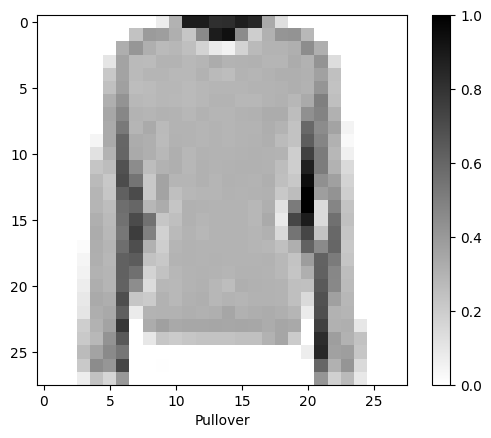

In [44]:
for image,label in train_norm.take(1):
    break
image = image.numpy().reshape((28,28))
plt.imshow(image,cmap='binary')
plt.xticks()
plt.yticks()
plt.xlabel(class_names[label])
plt.colorbar()
plt.show()

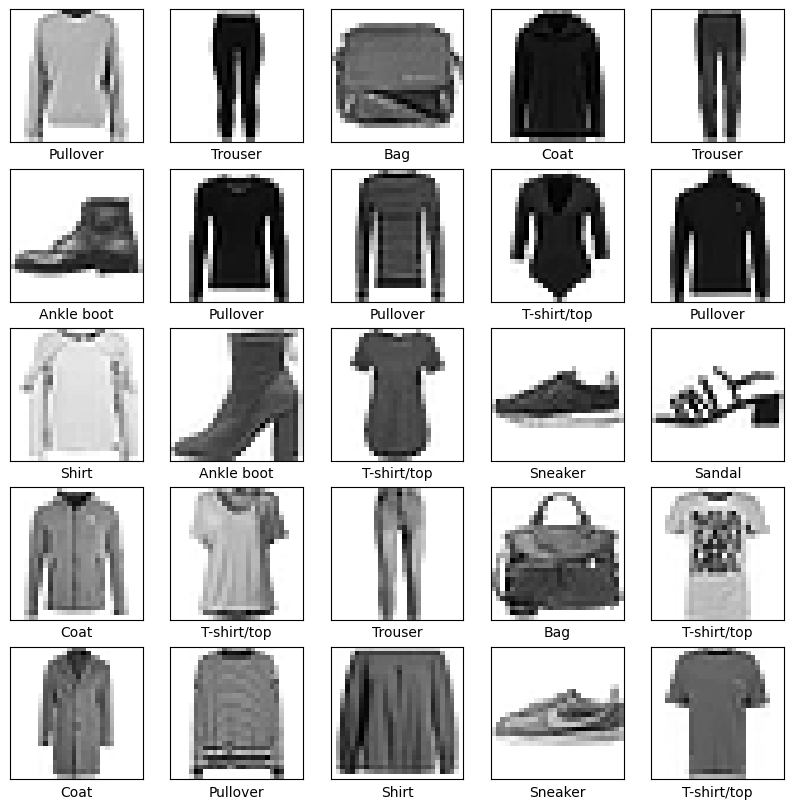

In [48]:
# Plot first 25 images

plt.figure(figsize=[10,10])
for i, (image,label) in enumerate(train_cache.take(25)):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.imshow(image,cmap='binary')
    plt.xlabel(class_names[label])
    plt.xticks([])
    plt.yticks([])

### Build the Model

In [49]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), padding='same', activation=tf.nn.relu,
                          input_shape = (28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [50]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [51]:
batch_size = 32
train_prep = train_cache.cache().repeat().shuffle(num_train).batch(batch_size)
test_prep = test_cache.cache().batch(batch_size)

In [52]:
model.fit(train_prep,epochs=10, steps_per_epoch=math.ceil(num_train/batch_size))

Epoch 1/10
1875/1875 [==============================] - 14s 4ms/step - loss: 0.3912 - accuracy: 0.8576
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2619 - accuracy: 0.9045
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2136 - accuracy: 0.9220
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1805 - accuracy: 0.9331
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1569 - accuracy: 0.9426
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1335 - accuracy: 0.9504
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1122 - accuracy: 0.9588
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0926 - accuracy: 0.9659
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0793 - accuracy: 0.9708
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.06

### Evaluate the model

In [54]:
test_loss,test_accuracy = model.evaluate(test_prep)

313/313 [==============================] - 1s 2ms/step - loss: 0.3164 - accuracy: 0.9182


In [55]:
test_accuracy

0.9182000160217285